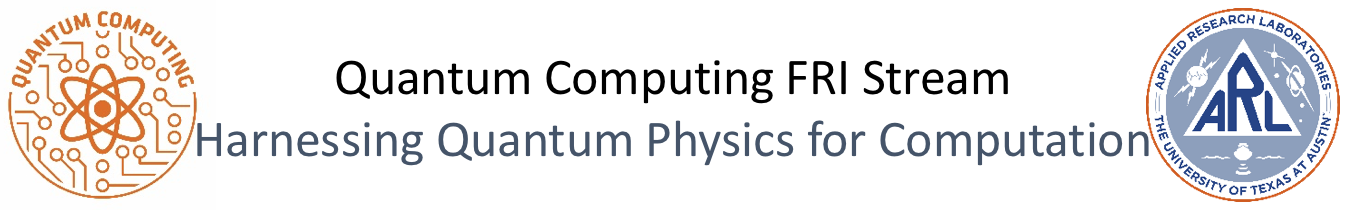

# Grover's Search Algorithm
## Lesson 6

### Installations and Imports

In [1]:
#In case you don't have qiskit, install it now
%pip install qiskit --quiet
%pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.7 MB/s eta 0:00:00


In [2]:
#Installing/upgrading pylatexenc seems to have fixed my mpl issue
#If you try this and it doesn't work, try also restarting the runtime/kernel
%pip install pylatexenc --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
#Let's go ahead and import all this stuff too
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, execute
from qiskit.quantum_info import Statevector
import numpy as np
from qiskit.visualization import plot_histogram, plot_state_qsphere, plot_bloch_multivector, plot_bloch_vector

## Today's Objectives

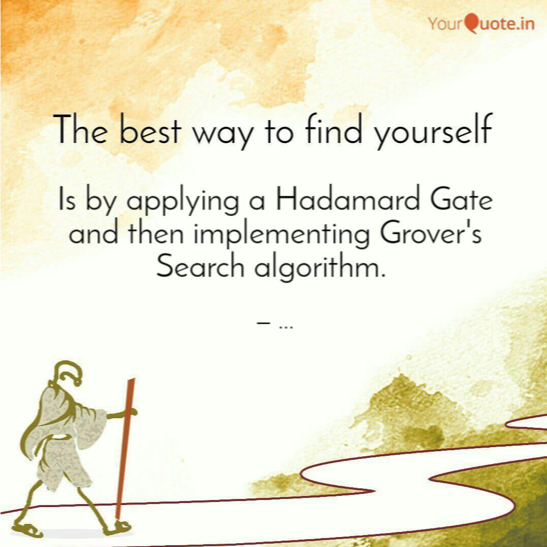

 - Implement Grover's Search Algorithm for the case of a single solution
 - Specifically, we want to be able to:
     - Determine the appropriate number of gates
     - Determine how many iterations to apply
     - Interpret the final state to extract the solution

## Boolean Search Problem

A Boolean search problem takes in an input and maps it to __True__ or __False__ (__0__ or __1__) depending on the details of that particular problem.

### <font color=green> Exercise 1 </font>

$\text{Problem: Identify the correct number for each of the different input sizes.}$

$\text{For each of the ranges given below, choose the correct number and type it in}$


0-1

0-3

0-1023

### <font color=orange> Answers </font>

In [4]:
np.random.choice(range(2))

1

In [5]:
np.random.choice(range(4))

0

In [6]:
np.random.choice(range(1024))

951

### Define the Problem

$\text{Let }f:\{0,\dots ,N-1\}\to\{0,1\}\text{ be an }\underline{\text{unstructured}}\text{ Boolean function.}\quad(N=2^{n})$

$f(a)=1\text{ indicates a solution.}\quad f(x)=0 \text{ for all other }x\neq a$

$\text{How many times must we evaluate }f\text{ to determine }a?$

### Classical Attempt

$$f(\color{red}{0})=0$$

$$ \vdots $$

$$f(\color{red}{a-1})=0$$

$$f(\color{green}{a})=1$$

$$f(\color{red}{a+1})=0$$

$$\vdots$$

$$f(\color{red}{N-1})=0$$

$\text{On average, a classical algorithm must perform }N/2\text{ evaluations of }f.\qquad \mathcal{O}(N)$

### Quantum Search, Simple Approach

$1) \text{ Start with an }n\text{-qubit input and 1-qubit output register.}$
$$|0\dots 0\rangle|0\rangle$$

$2) \text{ Apply Hadamards to the input register.}$
$$|0\dots 0\rangle|0\rangle \xrightarrow{\mathbf{H}_{1}\dots\mathbf{H}_{n}} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle |0\rangle\qquad\qquad\text{with }N=2^{n}$$

$3) \text{ Apply the unitary to implement }f.\text{ We refer to this }\mathbf{U}_{f}\text{ as the oracle.}$
$$\xrightarrow{\mathbf{U}_{f}} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle |f(x)\rangle = \frac{1}{\sqrt{N}}\sum_{x\neq a} |x\rangle |0\rangle + \frac{1}{\sqrt{N}} |a\rangle|1\rangle$$

$4) \text{ Measure. The input register takes the correct value of }a\text{ when the output register is in the }|1\rangle\text{ state.}$

$$\color{blue}{\text{But this only happens with a }1/N\text{ chance!}}$$

### <font color=green>Exercise 2</font>

$\text{Implement the }``\text{Simple Approach" algorithm for }f:\{0,1,2,3\}\to\{0,1\}\;\text{ with }a=1$

$$\text{That is }\; f(0)=0,\; f(1)=1,\; f(2)=0,\; f(3)=0 $$

$\text{Hint: For your oracle, use the built-in Toffoli gate in Qiskit }\qquad \texttt{qc.ccx(control,control,target)}$

$\text{What do you get when you measure the input and output registers?}$

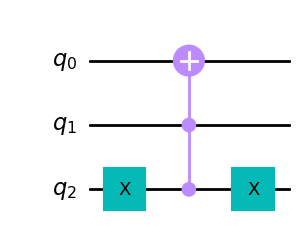

In [7]:
#Build a unitary to implement the function
U = QuantumCircuit(3)

U.x(2)
U.ccx(2,1,0)
U.x(2)

U.draw('mpl')

In [8]:
#Build the rest of your quantum circuit to implement the algorithm
#Hint: add the oracle to your circuit with qc.compose(U,qubits=[0,1,2],inplace=True)
qc = QuantumCircuit(3,3)

# YOUR CODE HERE

In [10]:
#Simulate your circuit!
backend = Aer.get_backend('qasm_simulator')
counts= execute(qc,backend, shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)

QiskitError: ignored

### <font color=orange>Answer</font>

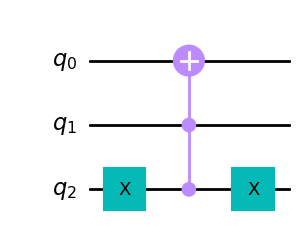

In [11]:
U = QuantumCircuit(3)

U.x(2)
U.ccx(2,1,0)
U.x(2)

U.draw('mpl')

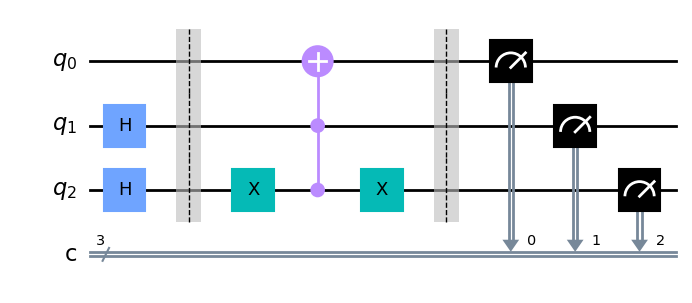

In [12]:
qc = QuantumCircuit(3,3)

qc.h(2)
qc.h(1)

qc.barrier()

qc.compose(U,qubits=[0,1,2],inplace=True)

qc.barrier()

for i in range(3):
    qc.measure(i,i)

qc.draw('mpl')

{'011': 254, '000': 251, '100': 264, '110': 255}


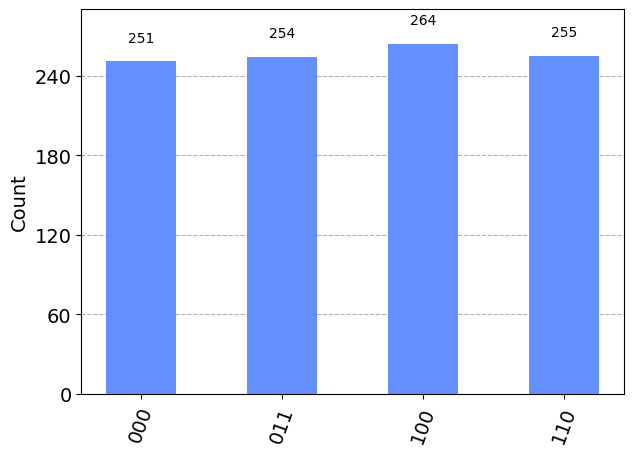

In [13]:
backend = Aer.get_backend('qasm_simulator')
counts= execute(qc,backend, shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)

It ... works!

$\text{The correct value for } \texttt{a=01} \text{ is marked by }1\text{ in the output qubit.}$
$\text{But we only get this result with probability }\frac{1}{4}.$

## Grover's Search Algorithm

Named after it's inventor, Lov Grover, this algorithm searches for a solution without taking advantage of the specific structure of the problem. The driving effect of the search algorithm has been generalized and is known as __amplitude amplification__.

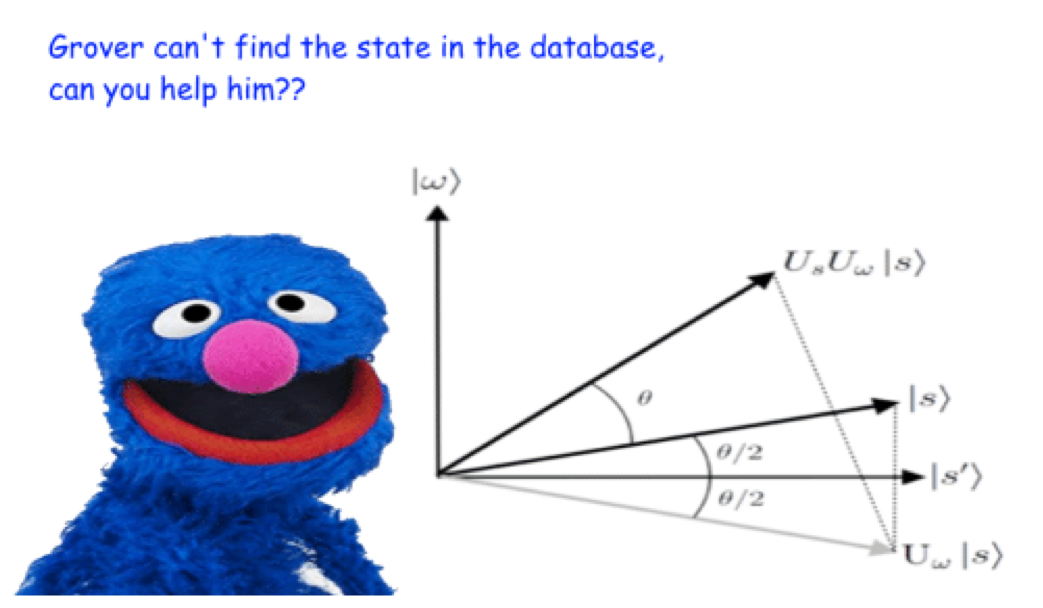

$1) \text{ Start with an }n\text{-qubit input and 1-qubit output register.}$
$$|0\dots 0\rangle|0\rangle$$

$2) \text{ Apply a NOT and then Hadamard to the output register.}$

$3) \text{ Apply Hadamards to the input register.}$

$4) \text{ Do the following }R\text{ times, where }R=\lfloor\pi\sqrt{N}/4\rfloor$

$\quad \text{a) Apply the oracle }\mathbf{U}_{f}$

$\quad \text{b) Apply }\mathbf{W}=-\prod_{i=1}^{n}\mathbf{H}_{i}\mathbf{X}_{i} \;\; \mathbf{C}^{\mathbf{Z}}_{n\dots 2 1}\;\prod_{j=1}^{n}\mathbf{X}_{j}\mathbf{H}_{j}\text{ to the input register}$

$5) \text{ Apply a Hadamard and then NOT gate to the output register.}$

$6) \text{ Measure the input register; the result is most likely }a.$

### <font color=green>Exercise 3</font>

$\text{Implement Grover's search algorithm for our oracle from above }\mathbf{U}_{f} = \mathbf{X}_{2}\mathbf{C}_{210}\mathbf{X}_{2}.$

$\text{What value of }a\text{ do you find?}$

$ $

$\text{Note: you can implement the minus sign in }\mathbf{W}\text{ by using the fact that}$

$$ -\mathbf{I}=\prod_{k=1}^{n}\mathbf{X}_{k}\mathbf{Z}_{k}\mathbf{X}_{k}\mathbf{Z}_{k}$$

$\text{... although the algorithm works just fine without the minus sign.}$

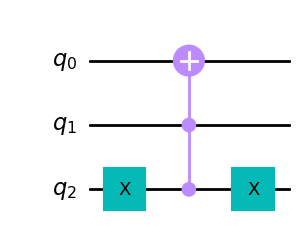

In [15]:
#As before
U = QuantumCircuit(3)

U.x(2)
U.ccx(2,1,0)
U.x(2)
U.draw('mpl')

In [16]:
#You will also want to build the W gate #(Feel free to ignore the negative sign)
W = QuantumCircuit(3)

# YOUR CODE HERE

In [17]:
#Calculate how many times to repeat step 4

# YOUR CODE HERE

In [18]:
#Build the rest of the circuit to implement the algorithm
qc = QuantumCircuit(3,2) #only measure the input register

# YOUR CODE HERE

In [19]:
#Simulate your circuit!
backend = Aer.get_backend('qasm_simulator')
counts= execute(qc,backend, shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)

QiskitError: ignored

### <font color=orange>Answer</font>

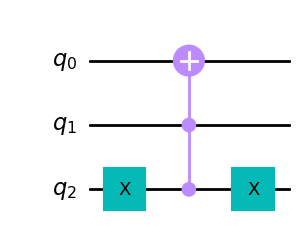

In [20]:
#As before
U = QuantumCircuit(3)

U.x(2)
U.ccx(2,1,0)
U.x(2)

U.draw('mpl')

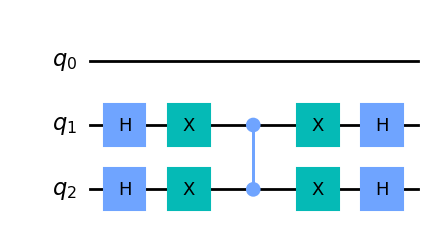

In [21]:
W = QuantumCircuit(3)

W.h(1)
W.x(1)
W.h(2)
W.x(2)

W.cz(2,1)

W.x(1)
W.h(1)
W.x(2)
W.h(2)

W.draw('mpl')

In [22]:
n=2
R = int(np.floor(np.pi*np.sqrt(2**n)/4))
print(R)

1


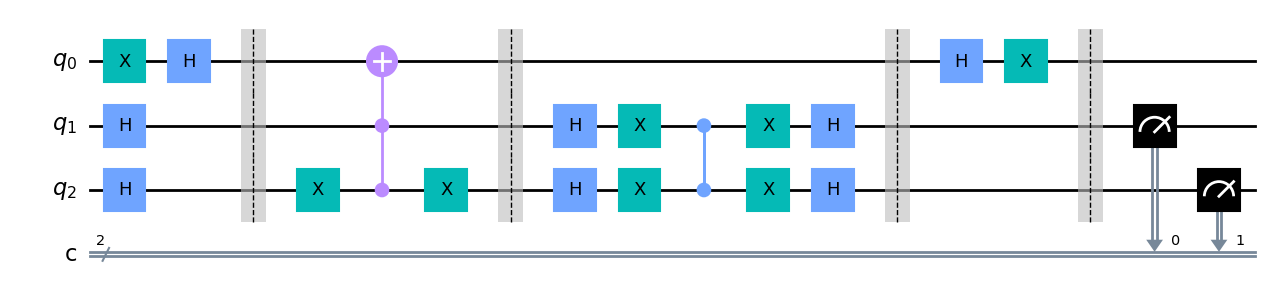

In [23]:
qc = QuantumCircuit(3,2)

qc.x(0)

qc.h(range(3))

qc.barrier()

for i in range(R):
    qc.compose(U,qubits=[0,1,2],inplace=True)
    qc.barrier()
    qc.compose(W,qubits=[0,1,2],inplace=True)
    qc.barrier()


qc.h(0)

qc.x(0)

qc.barrier()

for i in range(2):
    qc.measure(i+1,i)

qc.draw('mpl')

{'01': 1024}


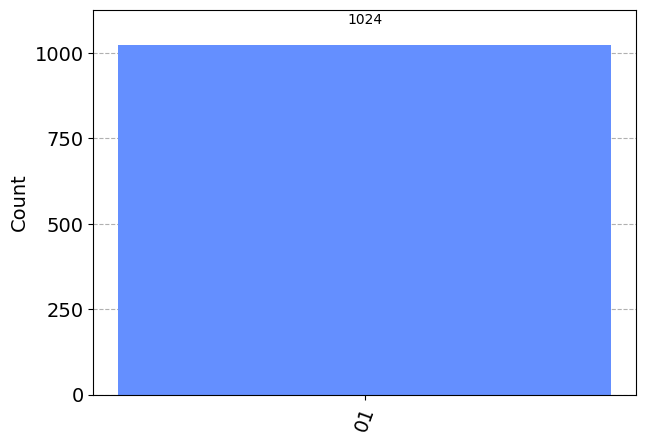

In [24]:
#Simulate your circuit!
backend = Aer.get_backend('qasm_simulator')
counts= execute(qc,backend, shots=1024).result().get_counts(qc)
print(counts)
plot_histogram(counts)

### How *DOES* He Do It?

$1)\qquad |0\dots 0\rangle\color{red}{|0\rangle}$

$2)\qquad \xrightarrow{\mathbf{X}_{0}} |0\dots 0\rangle\color{red}{|1\rangle} \xrightarrow{\mathbf{H}_{0}} |0\dots 0\rangle\color{red}{\left(\frac{|0\rangle-|1\rangle}{\sqrt{2}} \right)}$

$3)\qquad \xrightarrow{\mathbf{H}_{n}\dots\mathbf{H}_{1}} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle \color{red}{\left(\frac{|0\rangle-|1\rangle}{\sqrt{2}} \right)}$

$4a)\qquad \xrightarrow{\mathbf{U}_{f}} \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \color{blue}{(-1)^{f(x)}}|x\rangle \color{red}{\left(\frac{|0\rangle-|1\rangle}{\sqrt{2}} \right)}$
$$\color{blue}{|0\oplus f(x)\rangle - |1 \oplus f(x)\rangle = \Big\{ {|0\rangle-|1\rangle \quad \text{if }f(x)=0 \atop |1\rangle-|0\rangle \quad \text{if }f(x)=1}  }$$

#### We can ignore the output register!

$\text{The oracle leaves the output register unchanged and separable from the input}$

$$|x\rangle \color{red}{\left(\frac{|0\rangle-|1\rangle}{\sqrt{2}} \right)} \xrightarrow{\mathbf{U}_{f}} \color{blue}{(-1)^{f(x)}}|x\rangle \color{red}{\left(\frac{|0\rangle-|1\rangle}{\sqrt{2}} \right)}$$

$\text{So we can represent it by }\mathbf{V}_{f}\text{ acting only on the input register.}$

$$\mathbf{V}_{f}|x\rangle = (-1)^{f(x)}|x\rangle$$

$\text{In particular, }\quad \mathbf{V}_{f}|a\rangle = -|a\rangle\quad\text{ and }\quad\mathbf{V}_{f}|x\rangle = |x\rangle\quad\text{ for }x\neq{a}.$

$\text{So, }\mathbf{V}_{f}\text{ works as a projection: }$
$$\color{green}{\mathbf{V}_{f}=\mathbf{I}-2|a\rangle\langle a|}$$

#### Geometric Interpretation of $\mathbf{V}_{f}$

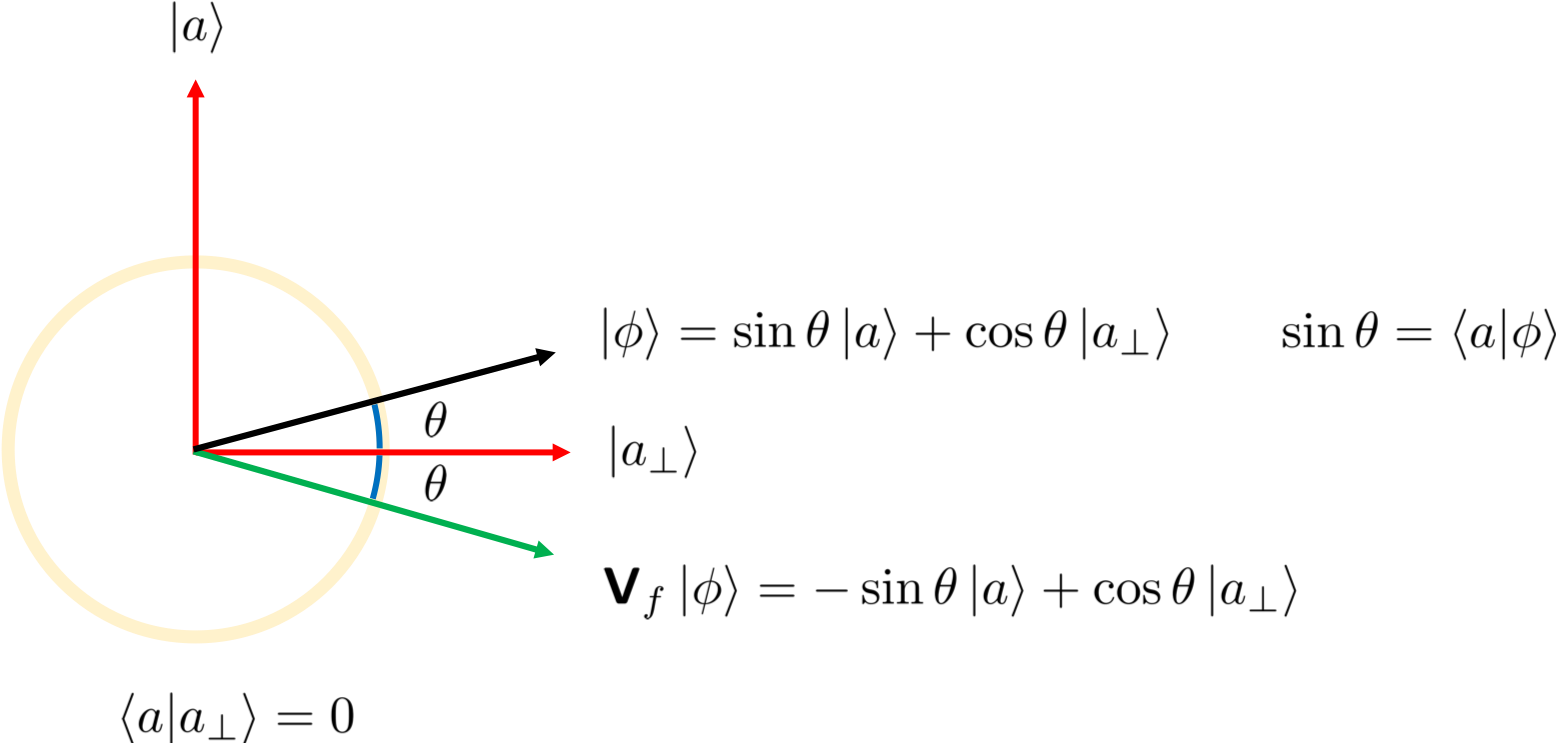

$$\mathbf{V}_{f}=\mathbf{I}-2|a\rangle\langle a| \quad \Bigg\lbrace {\mathbf{V}_{f}|a\rangle = -|a\rangle \atop \mathbf{V}_{f}|a_{\perp}\rangle = |a_{\perp}\rangle}$$
$ $
$$ \mathbf{V}_{f} \text{ acts as a mirror reflection about }|a_{\perp}\rangle$$

#### Another Look at $\mathbf{V}_{f}$

$\text{Let }|\phi\rangle\text{ be the state representing a superposition of all possible input states.}$

$$|\phi\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle$$

$ $

$
\begin{align}
\mathbf{V}_{f}|\phi\rangle =& \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} \color{blue}{(-1)^{f(x)}}|x\rangle = \frac{1}{\sqrt{N}}\sum_{\color{red}{x\neq a}} \color{blue}{(-1)^{0}}|x\rangle + \frac{1}{\sqrt{N}} \color{blue}{(-1)^{1}}|a\rangle \\
=& \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1} |x\rangle - \frac{2}{\sqrt{N}}|a\rangle\\
=& |\phi\rangle - \frac{2}{\sqrt{N}}|a\rangle
\end{align}
$

$$\mathbf{V}_{f}|\phi\rangle = |\phi\rangle - \frac{2}{\sqrt{N}}|a\rangle $$

#### What about the $\mathbf{W}$?

$\begin{align}
\mathbf{W}=&-\prod_{i=1}^{n}\mathbf{H}_{i}\color{red}{\mathbf{X}_{i}} \;\; \color{blue}{\mathbf{C}^{\mathbf{Z}}_{n\dots 2 1}}\;\prod_{j=1}^{n}\color{red}{\mathbf{X}_{j}}\mathbf{H}_{j} \\
=&-\prod_{i=1}^{n}\mathbf{H}_{i}\;\;\color{red}{\mathbf{X}_{1}\cdots \mathbf{X}_{n}}  \color{blue}{\left(\mathbf{I}-2|1\dots11\rangle\langle1\dots11|\right)}\color{red}{\mathbf{X}_{1}\cdots \mathbf{X}_{n}}\;\prod_{j=1}^{n}\mathbf{H}_{j} \\
=&-\left( \mathbf{I}-2\mathbf{H}_{1}\cdots\mathbf{H}_{n}|0\dots00\rangle\langle0\dots00|\mathbf{H}_{1}\cdots\mathbf{H}_{n}\right)\\
=&-\left(\mathbf{I}-2|\phi\rangle\langle\phi|\right)
\end{align}$

$ $

$$\mathbf{W}=2|\phi\rangle\langle\phi|-\mathbf{I}$$

#### Geometric Interpretation of $\mathbf{W}$

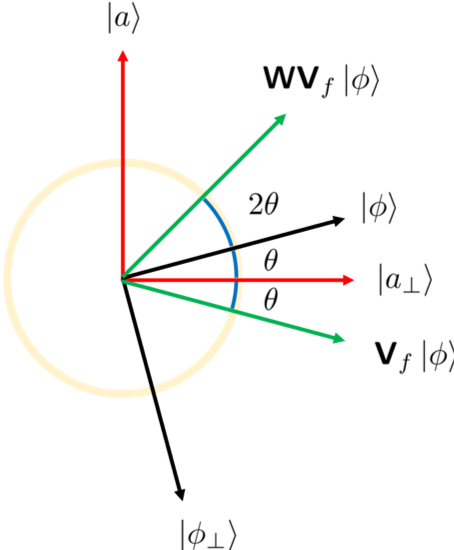

$$\mathbf{W}=2|\phi\rangle\langle \phi|-\mathbf{I} \quad \Bigg\lbrace {\mathbf{W}|\phi\rangle = |\phi\rangle \atop \mathbf{W}|\phi_{\perp}\rangle = -|\phi_{\perp}\rangle}$$
$ $
$$ \mathbf{W} \text{ acts as a mirror reflection about }|\phi\rangle$$

### Amplitude Amplification

$\text{Each application of }\mathbf{WV}_{f} \text{ rotates the state counterclockwise by }2\theta.$

$$\theta \to 3\theta \to \cdots \to (2R+1)\theta$$

$\text{We want }\left(\mathbf{WV}_{f}\right)^{R}|\phi\rangle \approx |a\rangle \text{, so find }R\text{ such that } \left(2R+1\right)\theta \approx \frac{\pi}{2}$

$$ \sin\theta = \langle a|\phi \rangle = \frac{1}{\sqrt{N}} \qquad \text{so} \qquad \theta \approx \frac{1}{\sqrt{N}} \quad \text{ for small }\theta$$

$ $

$$ R \approx \frac{\pi}{4\theta} - \frac{1}{2} \approx \frac{\pi}{4}\sqrt{N}-\frac{1}{2}$$

$ $

$$ R = \Bigg\lfloor \frac{\pi\sqrt{N}}{4}\Bigg\rfloor $$